## Mantle evolution curve

We first need the mantle evolution curve to draw the evolution of Osimium. The curve is obtained from Allègre and Luck (1980): **Ignore this curve**

$$(^{187}Os/^{186}Os) = (^{187}Os/^{186}Os)_0 + (^{187}Re/^{186}Os)_{mantle}(e^{\lambda t}-1)$$

The coefficients are as follow:

* $(^{187}Os/^{186}Os)_0 = 0.805$ (the intercept of the curve)

* $(^{187}Re/^{186}Os)_{mantle} = 3.15$ (the slope of the curve)

* $\lambda = 1.61e-11 yr^{-1}$

Another curve is for $^{187}Os/^{188}Os$ is as follows (from Walker et. al., 1989): **We used this curve**

$$(^{187}Os/^{188}Os) = (^{187}Os/^{186}Os)_0 + (^{187}Re/^{188}Os)_{mantle}(e^{\lambda t}-1)$$

The coefficients are as follow:

* $(^{187}Os/^{188}Os)_0 = 0.1296$ (the intercept of the curve)

* $(^{187}Re/^{188}Os)_{mantle} = 0.4345$ (the slope of the curve)

* $\lambda = 1.61e-11 yr^{-1}$


Allègre, C.J. and Luck, J.M., 1980. Osmium isotopes as petrogenetic and geological tracers. Earth and Planetary Science Letters, 48(1), pp.148-154.

Walker, R.J. and Morgan, J.W., 1989. Rhenium-osmium isotope systematics of carbonaceous chondrites. Science, 243(4890), pp.519-522.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

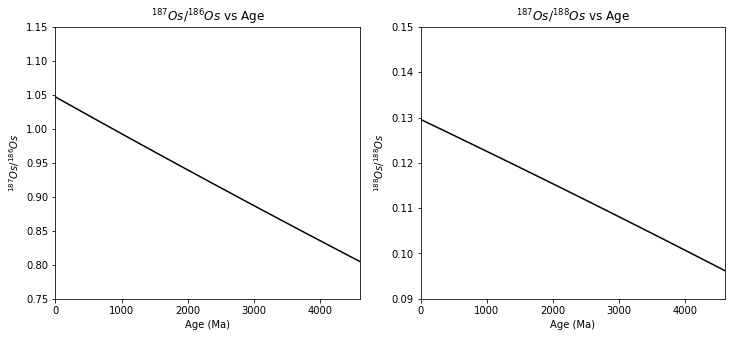

In [104]:
t = np.arange(0,4601,100)

Os187_Os186o = 0.805
Re187_Os186m = 3.15
lda = 1.61e-11

Os187_Os186 = Os187_Os186o + Re187_Os186m*(np.exp(lda*t*10**6)-1)
plt.figure(figsize=[12,5])
plt.subplot(121)
plt.plot(4600-t,Os187_Os186,"k-")
plt.xlim(0,4600)
plt.ylim(0.75,1.15)
plt.xlabel("Age (Ma)")
plt.ylabel(r"$^{187}Os/^{186}Os$")
plt.title(r"$^{187}Os/^{186}Os$ vs Age")

Os187_Os188o = 0.1296
Re187_Os188m = 0.4345
lda = 1.61e-11

plt.subplot(122)
Os187_Os188 = Os187_Os188o - Re187_Os188m*(np.exp(lda*t*10**6)-1)
plt.plot(t,Os187_Os188,"k-")
plt.xlim(0,4600)
plt.ylim(0.09,0.15)
plt.xlabel("Age (Ma)")
plt.ylabel(r"$^{188}Os/^{188}Os$")
plt.title(r"$^{187}Os/^{188}Os$ vs Age")
plt.show()

In [16]:
df = pd.read_csv("re_os_olondo.csv")
df

,Sample No.,Rock type,187Re/188Os,2se,187Os/188Os,2se.1,2s%,_Os p,187Os/188Osi,_Osi,TRD (Ma),2se.2,TMA (Ma),2se.3
0,OL1633,Ultramafic,0.256200,0.000200,0.12251,0.00010,0.08,-4.4,0.10938,2.9,2611,48,2002,37
1,OL1637,Ultramafic,0.018106,0.000004,0.10744,0.00002,0.02,-16.1,0.10651,0.2,3002,3,3002,3
2,OL1638,Ultramafic,0.012980,0.000010,0.10704,0.00008,0.08,-16.4,0.10638,0.1,3020,12,3020,12
3,OL1639,Ultramafic,0.007218,0.000005,0.10687,0.00007,0.07,-16.6,0.10650,0.2,3003,10,3003,10
4,OL1639-1,Ultramafic,0.006878,0.000001,0.10715,0.00002,0.01,-16.4,0.10680,0.5,2962,2,2962,2
5,OL1640,Ultramafic,0.004814,0.000001,0.10707,0.00003,0.03,-16.4,0.10682,0.5,2960,5,2959,5
6,OL1668,Ultramafic,0.302000,0.000100,0.11924,0.00004,0.04,-6.9,0.10377,-2.4,3373,17,4309,22
7,OL1669,Ultramafic,0.239900,0.000100,0.11600,0.00003,0.03,-9.4,0.10371,-2.4,3380,10,3880,11


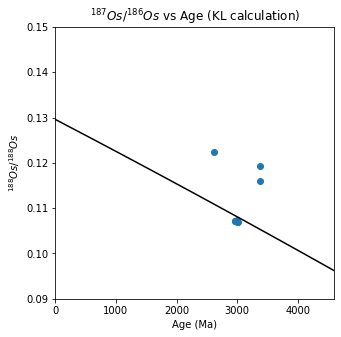

In [55]:
plt.figure(figsize=[5,5])
plt.plot(t,Os187_Os188,"k-")
plt.scatter(df["TRD (Ma)"],df["187Os/188Os"])
plt.xlim(0,4600)
plt.ylim(0.09,0.15)
plt.xlabel("Age (Ma)")
plt.ylabel(r"$^{188}Os/^{188}Os$")
plt.title(r"$^{187}Os/^{186}Os$ vs Age (KL calculation)")
plt.show()

### We examined the $\gamma$ and $T_{RD}$ calculation

The model age of a sample is the time at which its Os isotopic composition is the same as that of the mantle, i.e. $(^{187}Os/^{188}Os)_{sample} = (^{187}Os/^{188}Os)_{Mantle}$

#### $\gamma$

#### $T_{RD}$

$$T_{RD} = \frac{1}{\lambda} \left[ln\left[\frac{(^{187}Os/^{188}Os)_{Mantle}-^{187}Os/^{188}Os)_{Sample}}{(^{187}Re/^{188}Os)_{Mantle}} \right]+1\right]$$

The coefficients are as follow:

* $(^{187}Os/^{188}Os)_{Mantle} = 0.1296$

* $(^{187}Re/^{188}Os)_{Mantle} = 0.4345$

In [130]:
df["TRD_recal"] = 1/lda*(np.log((Os187_Os188o-df["187Os/188Os"].values)/Re187_Os188m+1))/10**6
df["TRD_recal"] = df["TRD_recal"].apply(round)

In [137]:
df["TMA_recal"] = 1/lda*(np.log((Os187_Os188o-df["187Os/188Os"].values)/(Re187_Os188m - df["187Re/188Os"].values)+1))/10**6
df["TMA_recal"] = df["TMA_recal"].apply(round)

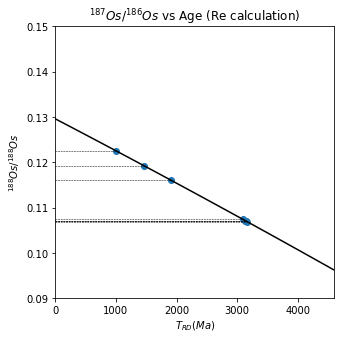

In [138]:
plt.figure(figsize=[5,5])
plt.plot(t,Os187_Os188,"k-")
plt.scatter(df["TRD_recal"],df["187Os/188Os"])
for i in range(0,len(df)):
    plt.plot([0,df["TRD_recal"][i]],[df["187Os/188Os"][i],df["187Os/188Os"][i]],"k--",linewidth=0.5)
plt.xlim(0,4600)
plt.ylim(0.09,0.15)
plt.xlabel(r"$T_{RD} (Ma)$")
plt.ylabel(r"$^{188}Os/^{188}Os$")
plt.title(r"$^{187}Os/^{186}Os$ vs Age (Re calculation)")
plt.show()

In [139]:
df

,Sample No.,Rock type,187Re/188Os,2se,187Os/188Os,2se.1,2s%,_Os p,187Os/188Osi,_Osi,TRD (Ma),2se.2,TMA (Ma),2se.3,TRD_recal,TMA_recal
0,OL1633,Ultramafic,0.256200,0.000200,0.12251,0.00010,0.08,-4.4,0.10938,2.9,2611,48,2002,37,1005,2422
1,OL1637,Ultramafic,0.018106,0.000004,0.10744,0.00002,0.02,-16.1,0.10651,0.2,3002,3,3002,3,3090,3221
2,OL1638,Ultramafic,0.012980,0.000010,0.10704,0.00008,0.08,-16.4,0.10638,0.1,3020,12,3020,12,3144,3238
3,OL1639,Ultramafic,0.007218,0.000005,0.10687,0.00007,0.07,-16.6,0.10650,0.2,3003,10,3003,10,3167,3219
4,OL1639-1,Ultramafic,0.006878,0.000001,0.10715,0.00002,0.01,-16.4,0.10680,0.5,2962,2,2962,2,3129,3178
5,OL1640,Ultramafic,0.004814,0.000001,0.10707,0.00003,0.03,-16.4,0.10682,0.5,2960,5,2959,5,3140,3174
6,OL1668,Ultramafic,0.302000,0.000100,0.11924,0.00004,0.04,-6.9,0.10377,-2.4,3373,17,4309,22,1464,4676
7,OL1669,Ultramafic,0.239900,0.000100,0.11600,0.00003,0.03,-9.4,0.10371,-2.4,3380,10,3880,11,1914,4196


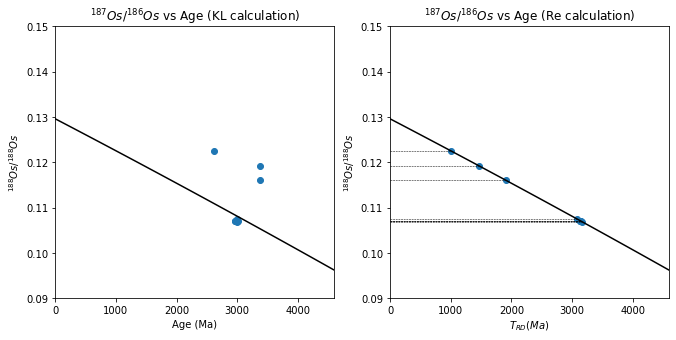

In [133]:
plt.figure(figsize=[11,5])

plt.subplot(121)
plt.plot(t,Os187_Os188,"k-")
plt.scatter(df["TRD (Ma)"],df["187Os/188Os"])
plt.xlim(0,4600)
plt.ylim(0.09,0.15)
plt.xlabel("Age (Ma)")
plt.ylabel(r"$^{188}Os/^{188}Os$")
plt.title(r"$^{187}Os/^{186}Os$ vs Age (KL calculation)")

plt.subplot(122)
plt.plot(t,Os187_Os188,"k-")
plt.scatter(df["TRD_recal"],df["187Os/188Os"])
for i in range(0,len(df)):
    plt.plot([0,df["TRD_recal"][i]],[df["187Os/188Os"][i],df["187Os/188Os"][i]],"k--",linewidth=0.5)
plt.xlim(0,4600)
plt.ylim(0.09,0.15)
plt.xlabel(r"$T_{RD} (Ma)$")
plt.ylabel(r"$^{188}Os/^{188}Os$")
plt.title(r"$^{187}Os/^{186}Os$ vs Age (Re calculation)")
plt.show()